In [1]:
import os 
import sys 
import time 
import numpy as np
import json
import tpch_training as tp 

In [2]:
DET_PARAMS_FNAME = "./training_params/detparams_5.json"
DET_PARAMS = None
with open(DET_PARAMS_FNAME, 'rb') as f:
    DET_PARAMS = json.load(f)
    print(len(DET_PARAMS))

training_fnames = ['./training_results/'+x for x in os.listdir('./training_results') if 'json' in x and 'sf10_main_test_ind' in x]
len(training_fnames)
print(training_fnames)

def get_spark_params(result_dict):
    param_vals = []
    for param in tp.SPARK_PARAMETERS:
        for p in result_dict['params']:
            if p['name'] == param['name']:
                param_vals.append(p['cur_value'])
    return tuple(param_vals)

91
['./training_results/sf10_main_test_ind.json', './training_results/sf10_main_test_ind1.json', './training_results/sf10_main_test_ind2.json']


In [3]:
defaults = tuple(a['default_value'] for a in tp.SPARK_PARAMETERS)
defaults

(1,
 '1g',
 2,
 1,
 '1g',
 '48m',
 'true',
 'true',
 '32k',
 '4m',
 'true',
 0.6,
 '128',
 'false',
 'lz4',
 1,
 200,
 200,
 0.5)

In [4]:
fname_numdata = {}
fname_numdet = {}
deterministic_data = {}

for fname in training_fnames:
    with open(fname,'r') as file:
        try:
            file_data = json.load(file)
        except:
            continue
        fname_numdata[fname] = len(file_data)
        deterministic_data[fname] = {}
        
        for k in DET_PARAMS:
            if k in file_data:
                deterministic_data[fname][k] = file_data[k]
        fname_numdet[fname] = len(deterministic_data[fname])
print(sum(fname_numdata.values()))
print(fname_numdata)
print(fname_numdet)

975
{'./training_results/sf10_main_test_ind.json': 670, './training_results/sf10_main_test_ind1.json': 102, './training_results/sf10_main_test_ind2.json': 203}
{'./training_results/sf10_main_test_ind.json': 91, './training_results/sf10_main_test_ind1.json': 91, './training_results/sf10_main_test_ind2.json': 91}


In [5]:
det_params = {}
det_rt = {}
for fname, data in deterministic_data.items():
    det_params[fname] = []
    det_rt[fname] = []
    for result_dict in data.values():
        det_params[fname].append(get_spark_params(result_dict))
        if result_dict['runtimes']:
            det_rt[fname].append(result_dict['runtimes']['total'])
prev_fname = fname
for fname in det_params:
    assert det_params[fname][0] == defaults, f'{det_params[fname][0]} !=\n{defaults}'
    #assert str(det_params[fname]) == str(det_params[prev_fname]), fname + " " + prev_fname
    print(fname, '\n',det_rt[fname][0], det_rt[fname][-1], max(det_rt[fname]), min(det_rt[fname]))

./training_results/sf10_main_test_ind.json 
 17.73514676094055 15.959094762802124 21.55800437927246 15.73914647102356
./training_results/sf10_main_test_ind1.json 
 16.60610342025757 16.704988718032837 22.39563512802124 16.02872943878174
./training_results/sf10_main_test_ind2.json 
 19.527423620224 20.204445362091064 22.412273168563843 17.694279670715332


In [6]:
# how many different param combos have we tried?
fname_num_params = {}
fname_valid = {}
for fname in training_fnames:
    with open(fname,'r+') as file:
        try:
            file_data = json.load(file)
        except:
            continue
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in file_data.values():
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0


In [7]:
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    print(fname[18:60], '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

963
/sf10_main_test_ind.json 
num unique params 667 total runs 670 valid runs 637
/sf10_main_test_ind1.json 
num unique params 99 total runs 102 valid runs 101
/sf10_main_test_ind2.json 
num unique params 197 total runs 203 valid runs 196


In [8]:
#det_rt

In [9]:
for fname in det_rt:
    all_runs = []
    for run in det_rt[fname]:
        all_runs.append(run)
        #print('avg ', round(np.average(run), 5), 'median', round(np.median(run), 5), 'range ', round(max(run)-min(run),5), 'std ', round(np.std(run), 5))
    print('overall runs avg ', round(np.average(all_runs), 5), 'median', round(np.median(all_runs), 5), 'range ', round(max(all_runs)-min(all_runs),5), 'std ', round(np.std(all_runs), 5))
              
        

overall runs avg  17.91431 median 17.60726 range  5.81886 std  1.48662
overall runs avg  18.5947 median 18.16014 range  6.36691 std  1.57272
overall runs avg  19.32314 median 19.2727 range  4.71799 std  0.84013


['sf1_test_deterministic_1668380093.1347888.json', 'sf1_test_random_1668381698.6677997.json', 'sf10_test_table_run_deterministic_54.json', 'sf10_main_test_clear_ports_deterministic_56.json', 'sf1_test_run_deterministic_53.json', 'sf10_main_test_clear_ports_deterministic_57.json', 'sf10_main_test_clear_ports_deterministic_58.json', 'sf10_test_individual3.json', 'sf10_test_individual.json', 'sf10_test_individual2.json', 'sf10_test_individual4.json', 'sf10_main_test_ind.json', '.ipynb_checkpoints', 'sf10_main_test_ind1.json', 'sf10_main_test_ind2.json', 'sf324_main_1.json', 'sf324_main_10.json', 'sf324_main_2.json', 'sf324_main_3.json', 'sf324_main_4.json', 'sf324_main_5.json', 'sf324_main_6.json', 'sf324_main_7.json', 'sf324_main_8.json', 'sf324_main_9.json', 'sf698_test_big_individual.json', 'sf1_main_job_1668300079.5477827.json', 'sf10_main_job_n4_mem_4000_deterministic_1668300558.212254.json', 'sf60_main_job_n4_mem_4000_deterministic_1668300678.9141335.json', 'sf10_main_job_n4_mem_400

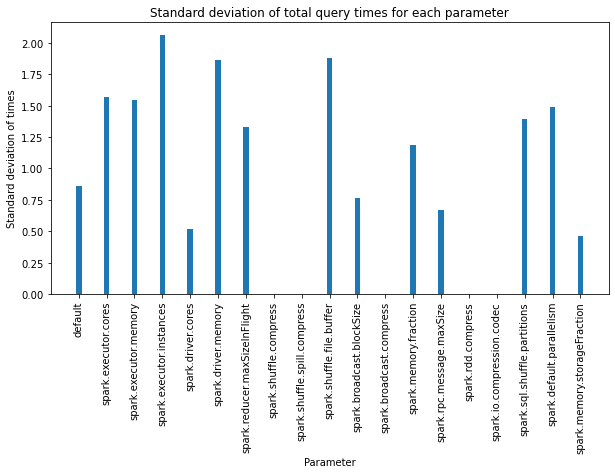

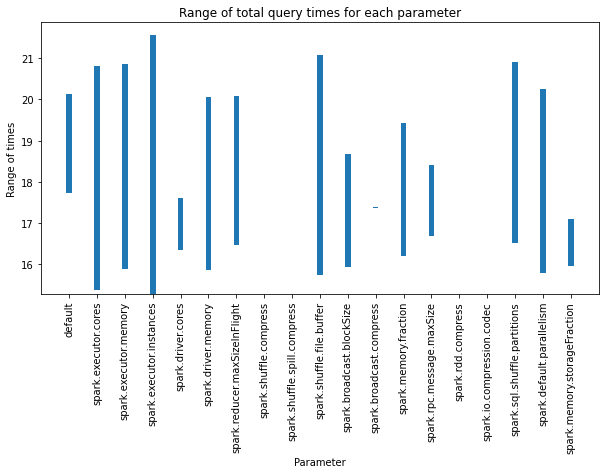

./training_results/sf10_main_test_ind1.json 102
deftotal [16.60610342025757, 21.02086901664734, 17.30810832977295, 17.769767999649048]
default, min: 16.6061, max: 21.02087, median 17.53894, avg: 18.17621  default: (16.6061, 21.02087)


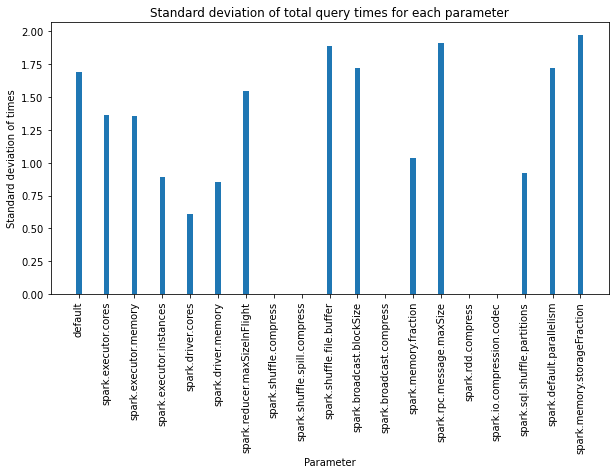

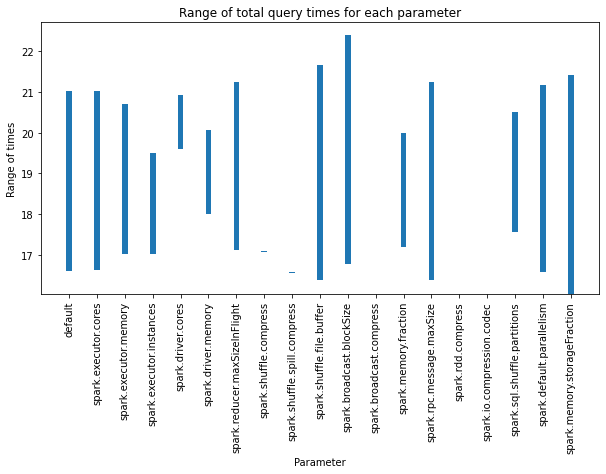

./training_results/sf10_main_test_ind2.json 203
deftotal [19.527423620224, 20.314794778823853, 20.35207724571228, 19.205318927764893, 18.72829842567444, 19.829018354415894]
default, min: 18.7283, max: 20.35208, median 19.67822, avg: 19.65949  default: (18.7283, 20.35208)


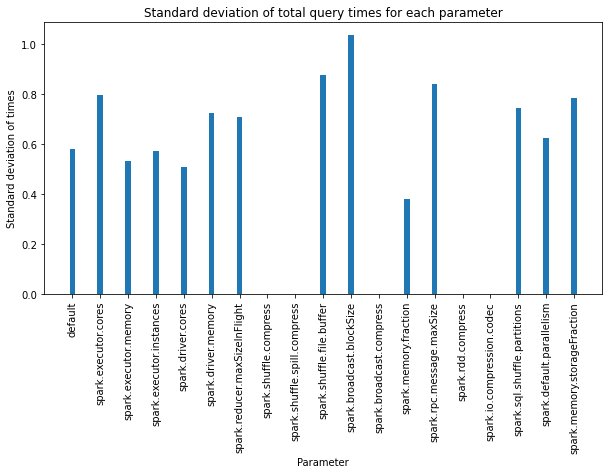

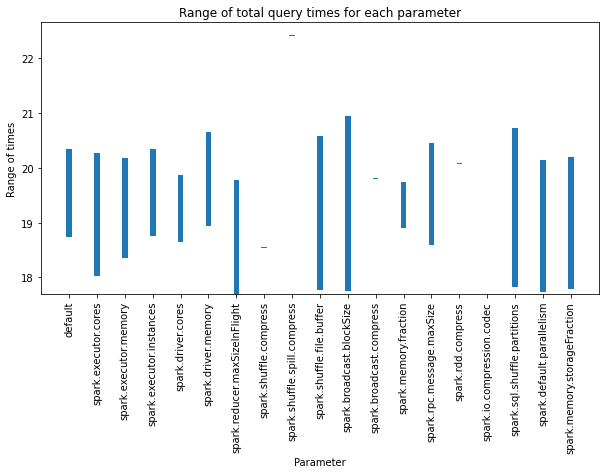

./training_results/sf324_main_1.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_10.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_2.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_3.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_4.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_5.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_6.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_7.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_8.json load error
Expecting value: line 1 column 1 (char 0)
./training_results/sf324_main_9.json load error
Expecting value: line 1 column 1 (char 0)


In [19]:
#training_fnames = ['./training_results/'+x for x in os.listdir('./training_results') if 'json' in x and 'test_clear_ports' in x]
#direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'
#training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'json' in x and 'nobackup_deterministic_raw_runtimes' in x]
direc = './training_results'
print(os.listdir(direc))
training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'json' in x and ('sf10_main_test_ind' in x or len(x) <= len('sf324_main_10.json'))]
#direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'

len(training_fnames)
print(training_fnames)
for FNAME in  training_fnames:
    import json
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    with open(FNAME,'r') as file:
        try:
            file_data = json.load(file)
        except Exception as e:
            print(FNAME, "load error")
            print(e)
            continue

    class Parameter:
        def __init__(self, name):
            self.name = name
            self.val_to_results = {}

        def add(self, param_val, results):
            self.val_to_results[param_val] = results

        def get_total(self, param_val):
            if param_val in self.val_to_results:
                return self.val_to_results[param_val]["total"]

        def get_param_vals(self):
            return set(self.val_to_results.keys())

    param_name_to_param_obj = {}

    def populate_params():
        #analyze one file

        f = open(FNAME)
        data = json.load(f)
        print(FNAME, len(data))
        for k in data:
            d = data[k]
            params = [p for p in d["params"] if p['spark_param']]
            runtimes = d["runtimes"]
            if len(runtimes) == 0:
                continue

            all_default = True
            for p in params:
                if str(p['cur_value']) != str(p['default_value']):
                    varying_param = p['name']
                    all_default = False
                    break
            if all_default:
                if 'default' not in param_name_to_param_obj:
                    param_name_to_param_obj["default"] = Parameter('default')
                    
                obj = param_name_to_param_obj["default"]
                obj.add(len(obj.val_to_results), runtimes)
                if k in runtimes and type(runtimes[k]) == list:
                    print(runtimes[k])
                    print('last', sorted([(runtimes[k][-1], k) for k in runtimes], reverse=True))
                    qt = [(runtimes[k][0], k) for k in runtimes if k != 'total']
                    print(min(qt), max(qt), sum([x[0] for x in qt]))
                    print('first', sorted(qt, reverse=True))
                    # TODO REMOVE
                    param_name_to_param_obj["default"] = {'total': runtimes['total'][10:]} 
                    # remove first runtime which is always much longer for some reason???
                continue

            if varying_param not in param_name_to_param_obj:
                param_name_to_param_obj[varying_param] = Parameter(varying_param)
            obj = param_name_to_param_obj[varying_param]
            assert "total" in runtimes
            obj.add(p['cur_value'], runtimes)

    def analyze_results():
        populate_params()
        default = param_name_to_param_obj["default"]
        default_total = [default.get_total(k) for k in default.get_param_vals()]
        print('deftotal',default_total)
        mins = []
        names = []
        diffs = []
        stds = []
        for p in param_name_to_param_obj:
            min_runtime = float("inf")
            max_runtime = -float("inf")
            times = []
            if p != 'default':
                obj = param_name_to_param_obj[p]
                for k in obj.get_param_vals():
                    total_time = obj.get_total(k)
                    if type(total_time) == list:
                        times.extend(total_time)
                        min_runtime = min(min_runtime, min(total_time))
                        max_runtime = max(max_runtime, max(total_time))
                    else:
                        times.append(total_time)
                        min_runtime = min(min_runtime, total_time)
                        max_runtime = max(max_runtime, total_time)
                if min_runtime == max_runtime:
                    max_runtime += .01


            else:
                times.extend(default_total)
                min_runtime = min(default_total)
                max_runtime = max(default_total)
            stds.append(np.std(times))
            if p == 'default':
                print(f"{p}, min: {round(min_runtime,5)}, max: {round(max_runtime,5)}, median {round(np.median(times),5)}, avg: {round(np.average(times),5)}  default: {round(min(default_total),5), round(max(default_total),5)}")
            mins.append(min_runtime)
            diffs.append(max_runtime - min_runtime)
            names.append(p)

        #save total time std to csv
        df = pd.DataFrame(list(zip(names, stds)),
        columns =['name', 'standard_dev_total_times'])
        df.to_csv("./training_sensitivity/all_runtime_stds.csv", mode='w')

        #plot std
        fig = plt.figure(figsize = (10, 5))
        plt.xticks(rotation=90)
        plt.bar(names, stds, bottom=[0]*len(names), width=0.2)
        plt.title("Standard deviation of total query times for each parameter")
        plt.xlabel("Parameter")
        plt.ylabel("Standard deviation of times")

        plt.savefig(f"./training_sensitivity/all_runtime_stds{FNAME[-7:-5]}.jpg", bbox_inches="tight")
        plt.show()

        #plot min/max times for each parameter
        fig = plt.figure(figsize = (10, 5))
        plt.xticks(rotation=90)
        plt.bar(names, diffs, bottom=mins, width=0.2)
        plt.title("Range of total query times for each parameter")
        plt.xlabel("Parameter")
        plt.ylabel("Range of times")
        plt.savefig(f"./training_sensitivity/all_runtime_ranges{FNAME[-7:-5]}.jpg", bbox_inches="tight")
        plt.show()

    analyze_results()

In [69]:
direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'
training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'json' in x and 'and_random' in x]
len(training_fnames)
print(training_fnames)
fname_numdata = {'all':0}

for fname in training_fnames:
    with open(fname,'r+') as file:
        
        try:
            file_data = json.load(file)
            fname_numdata[fname] = len(file_data)
            fname_numdata['all'] += len(file_data)
        except:
            print("error loading", fname)
print(sum(fname_numdata.values()))

# how many different param combos have we tried?
fname_num_params = {'all':set()}
fname_valid = {'all':0}
for fname in training_fnames:
    with open(fname,'r+') as file:
        try:
            file_data = json.load(file)
        except:
            print("error loading", fname)
            continue
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in file_data.values():
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0
            fname_num_params['all'].add(get_spark_params(result_dict))
            fname_valid['all'] += 1 if result_dict['runtimes'] else 0
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    if fname == 'all':
        print("all:")

    print(fname[100:160], '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

['../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_39.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_40.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_43.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_42.json', '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_41.json']
error loading ../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_41.json
12504
error loading ../../../../nobackup1/hoped/spark-autotuner/training_data/training_results/sf324_main_nobackup_deterministic_and_random_41.json
12230
all:
 
num unique params 5978 total runs 6252 va